<a href="https://colab.research.google.com/github/MANISH-KUMAR-CODES/Exploratory-Analysis-on-International-t20-/blob/main/Exploratory_Analysis_on_International_t20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<B>Analysis ON International t20

###Lets us first import all the necessary libraries of python

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
International_T20_Data = pd.read_csv('/content/drive/MyDrive/Copy of International_T20_Data.csv')

In [112]:
#lets check whats inside our data
International_T20_Data

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-03-05,2,"[datetime.date(2016, 3, 4)]",male,T20,6.0,Pakistan,20,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-08,1,"[datetime.date(2016, 3, 6)]",male,T20,8.0,India,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2016-02-03,1,"[datetime.date(2016, 2, 3)]",male,T20,NaN,Netherlands,20,...,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 6)]",male,T20,NaN,Australia,20,...,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#top 5 rows
International_T20_Data.head(5)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#last 5 rows
International_T20_Data.tail(5)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
1412,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-03-05,2,"[datetime.date(2016, 3, 4)]",male,T20,6.0,Pakistan,20,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-08,1,"[datetime.date(2016, 3, 6)]",male,T20,8.0,India,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2016-02-03,1,"[datetime.date(2016, 2, 3)]",male,T20,NaN,Netherlands,20,...,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 6)]",male,T20,NaN,Australia,20,...,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 9)]",male,T20,4.0,Australia,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#Checking info
International_T20_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   innings                      1417 non-null   object 
 1   meta.data_version            1417 non-null   float64
 2   meta.created                 1417 non-null   object 
 3   meta.revision                1417 non-null   int64  
 4   info.dates                   1417 non-null   object 
 5   info.gender                  1417 non-null   object 
 6   info.match_type              1417 non-null   object 
 7   info.outcome.by.wickets      651 non-null    float64
 8   info.outcome.winner          1372 non-null   object 
 9   info.overs                   1417 non-null   int64  
 10  info.player_of_match         1255 non-null   object 
 11  info.teams                   1417 non-null   object 
 12  info.toss.decision           1417 non-null   object 
 13  info.toss.winner  

In [116]:
#checking descriptive summary
International_T20_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
meta.data_version,1417.0,0.900000,5.108829e-15,0.9,0.9,0.9,0.90,0.9
meta.revision,1417.0,1.370501,5.751977e-01,1.0,1.0,1.0,2.00,5.0
info.outcome.by.wickets,651.0,6.476190,1.987802e+00,1.0,5.0,7.0,8.00,10.0
info.overs,1417.0,20.063514,1.379399e+00,20.0,20.0,20.0,20.00,50.0
info.outcome.by.runs,721.0,39.088766,3.338576e+01,1.0,13.0,30.0,56.00,249.0
info.match_type_number,684.0,748.774854,1.900503e+02,380.0,627.0,746.5,883.25,1104.0
info.neutral_venue,328.0,1.000000,0.000000e+00,1.0,1.0,1.0,1.00,1.0


In [117]:
#lets us define a function to replace column names
def replace_name(dataframe):
    dataframe.astype(str)
    dataframe_new_column=[]
    for i in dataframe.columns:
       if  'meta.' in i:
          i = i.replace('meta.','')
          dataframe_new_column.append(i)
       else: 
             'info.' in i
             i = i.replace('info.','')
             dataframe_new_column.append(i)
    return dataframe_new_column

In [118]:
new_columns = replace_name(International_T20_Data)
new_columns

['innings',
 'data_version',
 'created',
 'revision',
 'dates',
 'gender',
 'match_type',
 'outcome.by.wickets',
 'outcome.winner',
 'overs',
 'player_of_match',
 'teams',
 'toss.decision',
 'toss.winner',
 'umpires',
 'venue',
 'city',
 'outcome.by.runs',
 'match_type_number',
 'neutral_venue',
 'outcome.method',
 'outcome.result',
 'outcome.eliminator',
 'supersubs.New Zealand',
 'supersubs.South Africa',
 'bowl_out',
 'outcome.bowl_out']

In [119]:
International_T20_Data.columns = new_columns
International_T20_Data.head()

,innings,data_version,created,revision,dates,gender,match_type,outcome.by.wickets,outcome.winner,overs,...,outcome.by.runs,match_type_number,neutral_venue,outcome.method,outcome.result,outcome.eliminator,supersubs.New Zealand,supersubs.South Africa,bowl_out,outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
International_T20_Data.isnull().sum()

innings                      0
data_version                 0
created                      0
revision                     0
dates                        0
gender                       0
match_type                   0
outcome.by.wickets         766
outcome.winner              45
overs                        0
player_of_match            162
teams                        0
toss.decision                0
toss.winner                  0
umpires                     22
venue                        0
city                       189
outcome.by.runs            696
match_type_number          733
neutral_venue             1089
outcome.method            1366
outcome.result            1372
outcome.eliminator        1401
supersubs.New Zealand     1416
supersubs.South Africa    1416
bowl_out                  1415
outcome.bowl_out          1415
dtype: int64

###As we can see some columns have 1415 null values out of 1417 entries.It will be better if we drop all these columns.

In [121]:
International_T20_Data=International_T20_Data.drop(['outcome.bowl_out','bowl_out','supersubs.South Africa','supersubs.New Zealand','outcome.eliminator','outcome.method','outcome.result'], axis = 1)

In [122]:
#lets again check our nulls again
International_T20_Data.isnull().sum()

innings                  0
data_version             0
created                  0
revision                 0
dates                    0
gender                   0
match_type               0
outcome.by.wickets     766
outcome.winner          45
overs                    0
player_of_match        162
teams                    0
toss.decision            0
toss.winner              0
umpires                 22
venue                    0
city                   189
outcome.by.runs        696
match_type_number      733
neutral_venue         1089
dtype: int64

In [123]:
#lets fill all the null valeues with 0
International_T20_Data=International_T20_Data.fillna(0)

In [124]:
#lets again check our nulls again
International_T20_Data.isnull().sum()

innings               0
data_version          0
created               0
revision              0
dates                 0
gender                0
match_type            0
outcome.by.wickets    0
outcome.winner        0
overs                 0
player_of_match       0
teams                 0
toss.decision         0
toss.winner           0
umpires               0
venue                 0
city                  0
outcome.by.runs       0
match_type_number     0
neutral_venue         0
dtype: int64

###We also see that there are columns like dataversion ,revision and created which is of no use for our analysis , lets drops these columns from our dataframe

In [125]:
International_T20_Data=International_T20_Data.drop(['data_version','created','revision'],axis =1)


In [126]:
International_T20_Data.columns.unique()

Index(['innings', 'dates', 'gender', 'match_type', 'outcome.by.wickets',
       'outcome.winner', 'overs', 'player_of_match', 'teams', 'toss.decision',
       'toss.winner', 'umpires', 'venue', 'city', 'outcome.by.runs',
       'match_type_number', 'neutral_venue'],
      dtype='object')

##Our date column is not in correct format .we need to change that

In [127]:
def modifying_date(dataframe):
    dates=[]
    for i in dataframe.dates:
        i = i.replace('[datetime.date(','').replace(')]','').replace(',','-').replace("['",'').replace("']",'')
        dates.append(i)
    return dates    

In [128]:
dates = modifying_date(International_T20_Data)

In [129]:
International_T20_Data['dates']=dates
International_T20_Data['dates'].astype(str)

0       2017- 2- 17
1       2017- 2- 19
2       2017- 2- 22
3        2016- 9- 5
4       2016- 6- 18
           ...     
1412     2016- 3- 4
1413     2016- 3- 6
1414     2016- 2- 3
1415     2016- 9- 6
1416     2016- 9- 9
Name: dates, Length: 1417, dtype: object

In [130]:
#checking our dataframe again
International_T20_Data.head()

,innings,dates,gender,match_type,outcome.by.wickets,outcome.winner,overs,player_of_match,teams,toss.decision,toss.winner,umpires,venue,city,outcome.by.runs,match_type_number,neutral_venue
0,"[{'1st innings': {'team': 'Australia', 'delive...",2017- 2- 17,male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,0,0.0,0.0,0.0
1,"[{'1st innings': {'team': 'Australia', 'delive...",2017- 2- 19,male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,0.0,0.0,0.0
2,"[{'1st innings': {'team': 'Australia', 'delive...",2017- 2- 22,male,T20,0.0,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,0,41.0,0.0,0.0
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",2016- 9- 5,male,T20,0.0,Hong Kong,20,0,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,0.0,0.0
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",2016- 6- 18,male,T20,0.0,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,0,2.0,0.0,0.0


##lets us fix some columns names by replacing '.' from them with '_'

In [131]:
International_T20_Data.rename(columns = {'outcome.by.wickets':'outcome_by_wickets', 'outcome.winner':'outcome_winner','toss.decision':'toss_decision','toss.winner':'toss_winner','outcome.by.runs':'outcome_by_runs'}, inplace = True)

##Lets us check the top winning teams

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

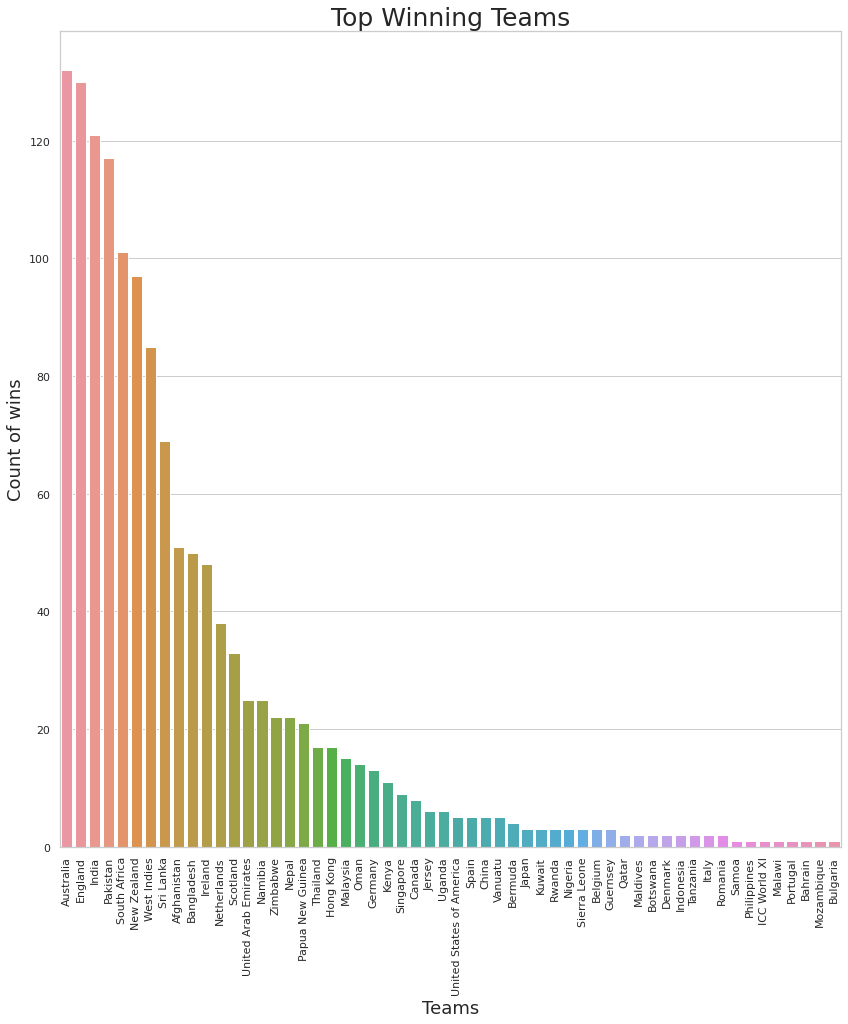

In [132]:
topwinning_teams = International_T20_Data['outcome_winner'].value_counts().drop(0,axis = 0)
plt.figure(figsize=(14,15))                              #setting figure size
plt.xlabel('Teams',size=18)                              
plt.ylabel('Count of wins',size = 18)
plt.title('Top Winning Teams',size=25)
sns.set_theme(style="whitegrid")
#using barplot
sns.barplot(topwinning_teams.index,topwinning_teams.values)
plt.xticks(rotation = 90)

##lets check winning teams based on their field decesion

In [133]:
winning_teams_field_decision = International_T20_Data.groupby('toss_decision')['outcome_winner'].value_counts()

In [134]:
print(winning_teams_field_decision)

toss_decision  outcome_winner
bat            Australia         72
               England           67
               Pakistan          67
               South Africa      42
               West Indies       42
                                 ..
field          Maldives           1
               Mozambique         1
               Philippines        1
               Sierra Leone       1
               Uganda             1
Name: outcome_winner, Length: 96, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


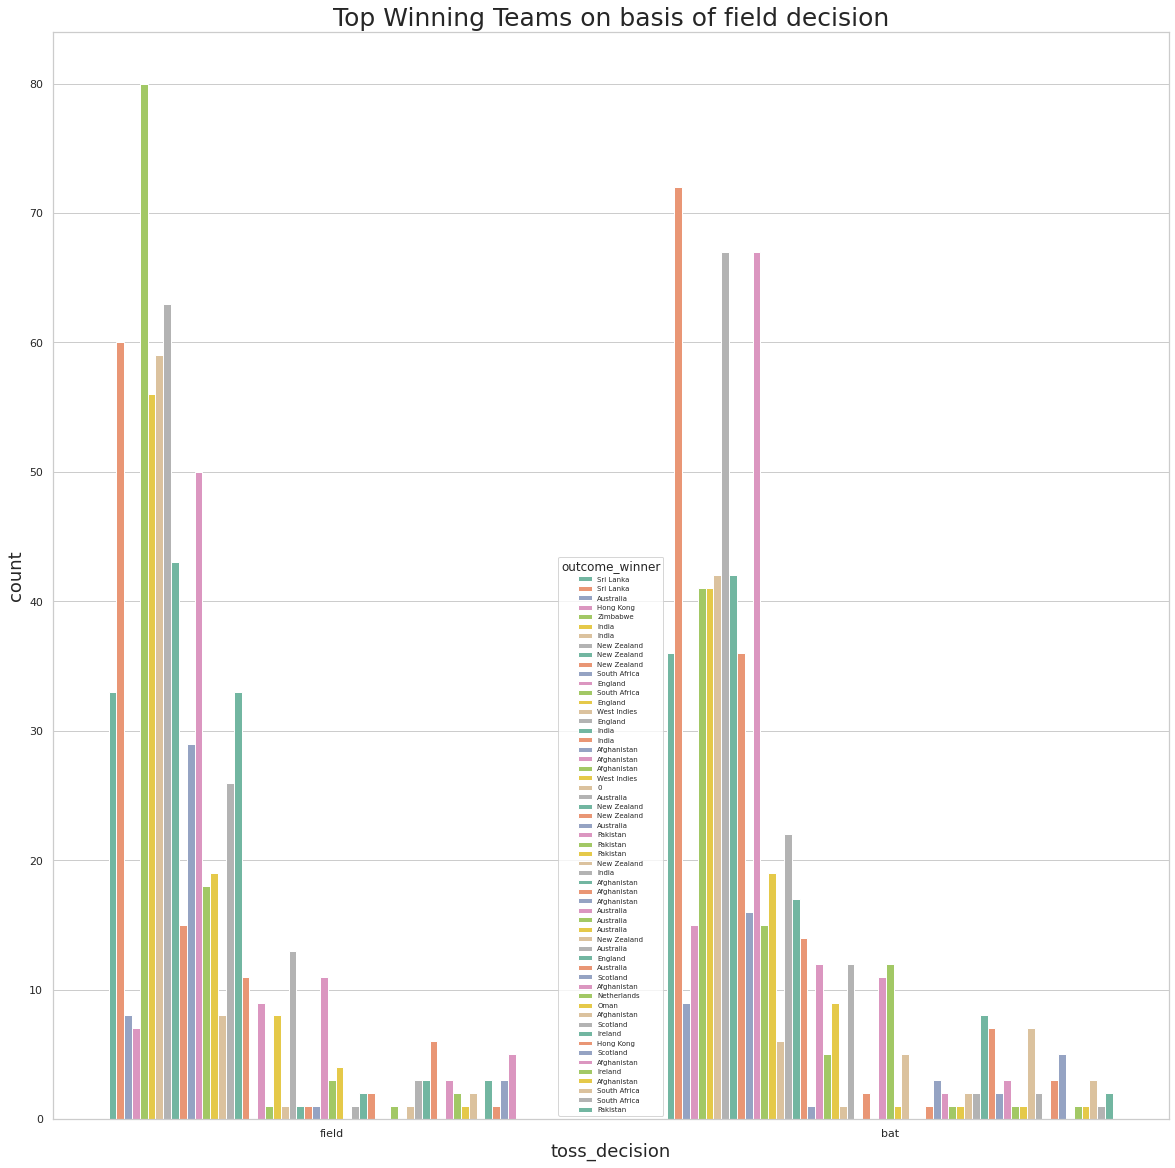

In [135]:
plt.figure(figsize=(20,20))                              #setting figure size
plt.xlabel('Teams',size=18)                              
plt.ylabel('Count of wins',size = 18)
plt.title('Top Winning Teams on basis of field decision',size=25)
sns.set_theme(style="whitegrid")
#using countplot
sns.countplot(x='toss_decision',hue ='outcome_winner',data = International_T20_Data,palette= 'Set2')
plt.legend(International_T20_Data.outcome_winner, loc="Top right", title="outcome_winner",fontsize = "xx-small");


## lets check which teams have played most innings together with their counts


In [ ]:
Teams = International_T20_Data.teams.value_counts().head(30)
Teams

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Teams')

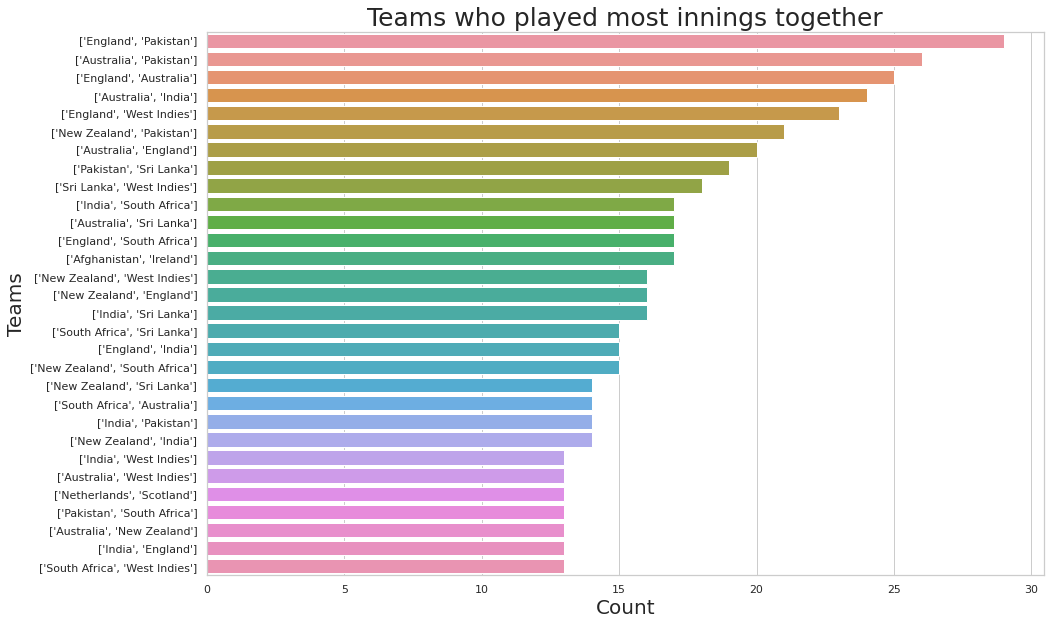

In [142]:
#Plotting a bar plot
plt.figure(figsize=(15,10))                              #setting figure size                           
plt.title('Teams who played most innings together',size=25)
sns.set_theme(style="whitegrid")
sns.barplot(Teams,Teams.index)
plt.xlabel('Count',size = 20)
plt.ylabel('Teams',size = 20)